<a href="https://colab.research.google.com/github/fpinell/hands_on_python_for_ds/blob/main/notebooks/phd/Lesson_3_supervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hands on Python for Data Science


- ### PhD IMT School for advanced studies Lucca

- ### Master II Livello - Data Science and Statistical Learning (MD2SL) 2021-2022

#### Fabio Pinelli
<a href="mailto:fabio.pinelli@imtlucca.it">fabio.pinelli@imtlucca.it</a><br/>
IMT School for Advanced Studies Lucca<br/>
2021/2022<br/>
June, 24 2022

# Today lesson 

- How to organize a ML project and the steps you need to perform
- Regression 
- Classification 

... and some scikit-learn functionalities to authomatize the ML process. 

# Taxonomy of ML

-  Roughly speaking there are two main **categories** of ML tasks:

    1.  **Supervised Learning**: Given a set of **labeled** examples, **predict** the labels of _new and unseen_ examples
    2.  **Unsupervised Learning**: Given a set of examples, **find structure** in the data (e.g., _clusters_, _subspaces_, _manifolds_)

## Supervised learning
The main difference between **Regression** and **Classification** algorithms that: 
- **Regression** algorithms are used to predict the _continuous values_ such as price, salary, age, etc. and
- **Classification** algorithms are used to predict/classify the _discrete values_ such as Male or Female, True or False, Spam or Not Spam, etc.



# Check list for a Machine Learning project 

1. Understand the problem.
2. Get the data.
3. Discover and visualize the data to gain insights.
4. Prepare the data for Machine Learning algorithms.
  - split on training and test
  - handling missing values
  - categorical values
  - scaling 
  - etc.
5. Compare different models, choose the best and train it.
6. Fine-tune your model.
7. Present your solution.
  - stakeholder
  - paper
  - supervisor
  - etc.



## Understand the problem.

### A regression  problem

We load data of a dataset that contains the median house prices in California. So the prices can assume _continous_ values, therefore we need to apply *Regression* methods/algorithms.

It is a quite old dataset, however it presents the basic properties needed to explain the different tasks that a **Data Scientist** should take into account before delivering any results. 


In order to understand the problem, we need to clarify some aspects that will influence the rest of the pipeline/project: 

- **[Supervised/Unsupervise]:** Since we do have _labels_ (prices) we can use a **_Supervised_** method. 

- **[Classification/Regression]:** can assume _continous_ values, therefore we need to apply **_Regression_** methods/algorithms

- **[Evalutation]:** How to evaluate the performance of our models, defining a measure of error/accuracy

#### Error
Since we are in regression problem there are some options out there: 
- **RMSE** Root Mean Square Error
  - Also called _Euclidean Norm_ or $l_2$ _norm_  and indicated with \|\|.\|\|_2 

- **MAE**  Mean Absolute Error
  - Also called Manhattan norm because it measures the distance between two points in a city if you can only travel along orthoganal city blocks. It is also called $l_1$ _norm_ and indicated with \|\|.\|\|_2

- **[Considerations]** 
  - Generally, with a larger $K$ in $l_k$ The higher the norm index, the more it focuses on large values and neglects small
ones. This is why the **RMSE is more sensitive to outliers** than the MAE.  
  - when outliers are exponentially rare (like in a bell-shaped curve), the RMSE performs very well and is generally preferred.
  


In [13]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import os



# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns


# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

from google.colab import drive
drive.mount('/content/drive')

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Get the data

Let's get the data from our shared drive. 

We want to estimate the median_house_value per district.


``` python
from google.colab import drive
drive.mount('/content/drive')
```

In [2]:
housing = pd.read_csv('/content/drive/Shareddrives/phd_hands_on/data/housing/housing.csv')

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
print('N. of rows: {}'.format(housing.shape[0]))
print('N. of columns: {}'.format(housing.shape[1]))
print('The columns contained in our first dataframe are:\n{}'.format( ',\n'.join('{}. {}'.format(i,c) for i,c in enumerate(housing.columns)) ))

N. of rows: 20640
N. of columns: 10
The columns contained in our first dataframe are:
0. longitude,
1. latitude,
2. housing_median_age,
3. total_rooms,
4. total_bedrooms,
5. population,
6. households,
7. median_income,
8. median_house_value,
9. ocean_proximity


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


```
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 **4   total_bedrooms      20433 non-null  float64**
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
** 9   ocean_proximity     20640 non-null  object **
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
```

Two columns present some peculiarities? 

- total_bedrooms
- ocean_proximity

Do you know these peculiarities? 

In [5]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Explore the data and visualize

It helps to identify peculierities in our datasets, and if we -- data scientist -- we need to take into account some specificity that we highlight through some simple visualization plots. 

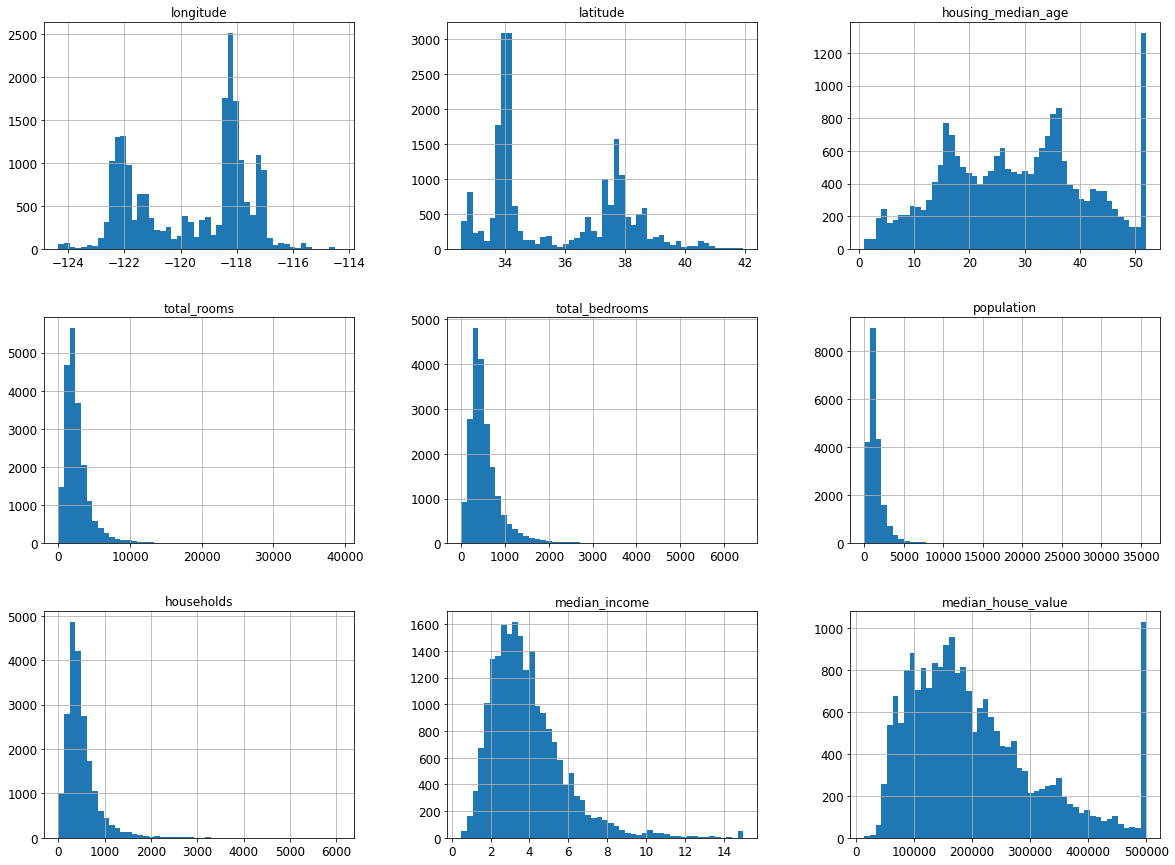

In [7]:
'''
We call hist() function defined for pandas dataframes. 
It's a Pandas function that generates histograms for numerical features
'''

housing.hist(bins=50, figsize=(20,15))
plt.show()

### Some comments on the data

1. The variable _median income_ doesn't seem to be expressed in US dollars.
   + They are capped:
    - to 15 (15000) for higher median income
    - 0.5 for lower median income
   + The numbers represent tens of thousands of dollars: 3\$-->3000\$
2. The housing __median age__ and the __median house__ value are also capped
3. All the features present almost a different scale w.r.t. the others. 
4. Many histograms are tail-heavy. The machine learning algorithms can have problems to detect this not-that-frequent patterns. 

We discussed some other functions to easily and quickly visualize the data of our dataframes. 

- Correlation Matrix
- Seaborn pairplots 
- KDE

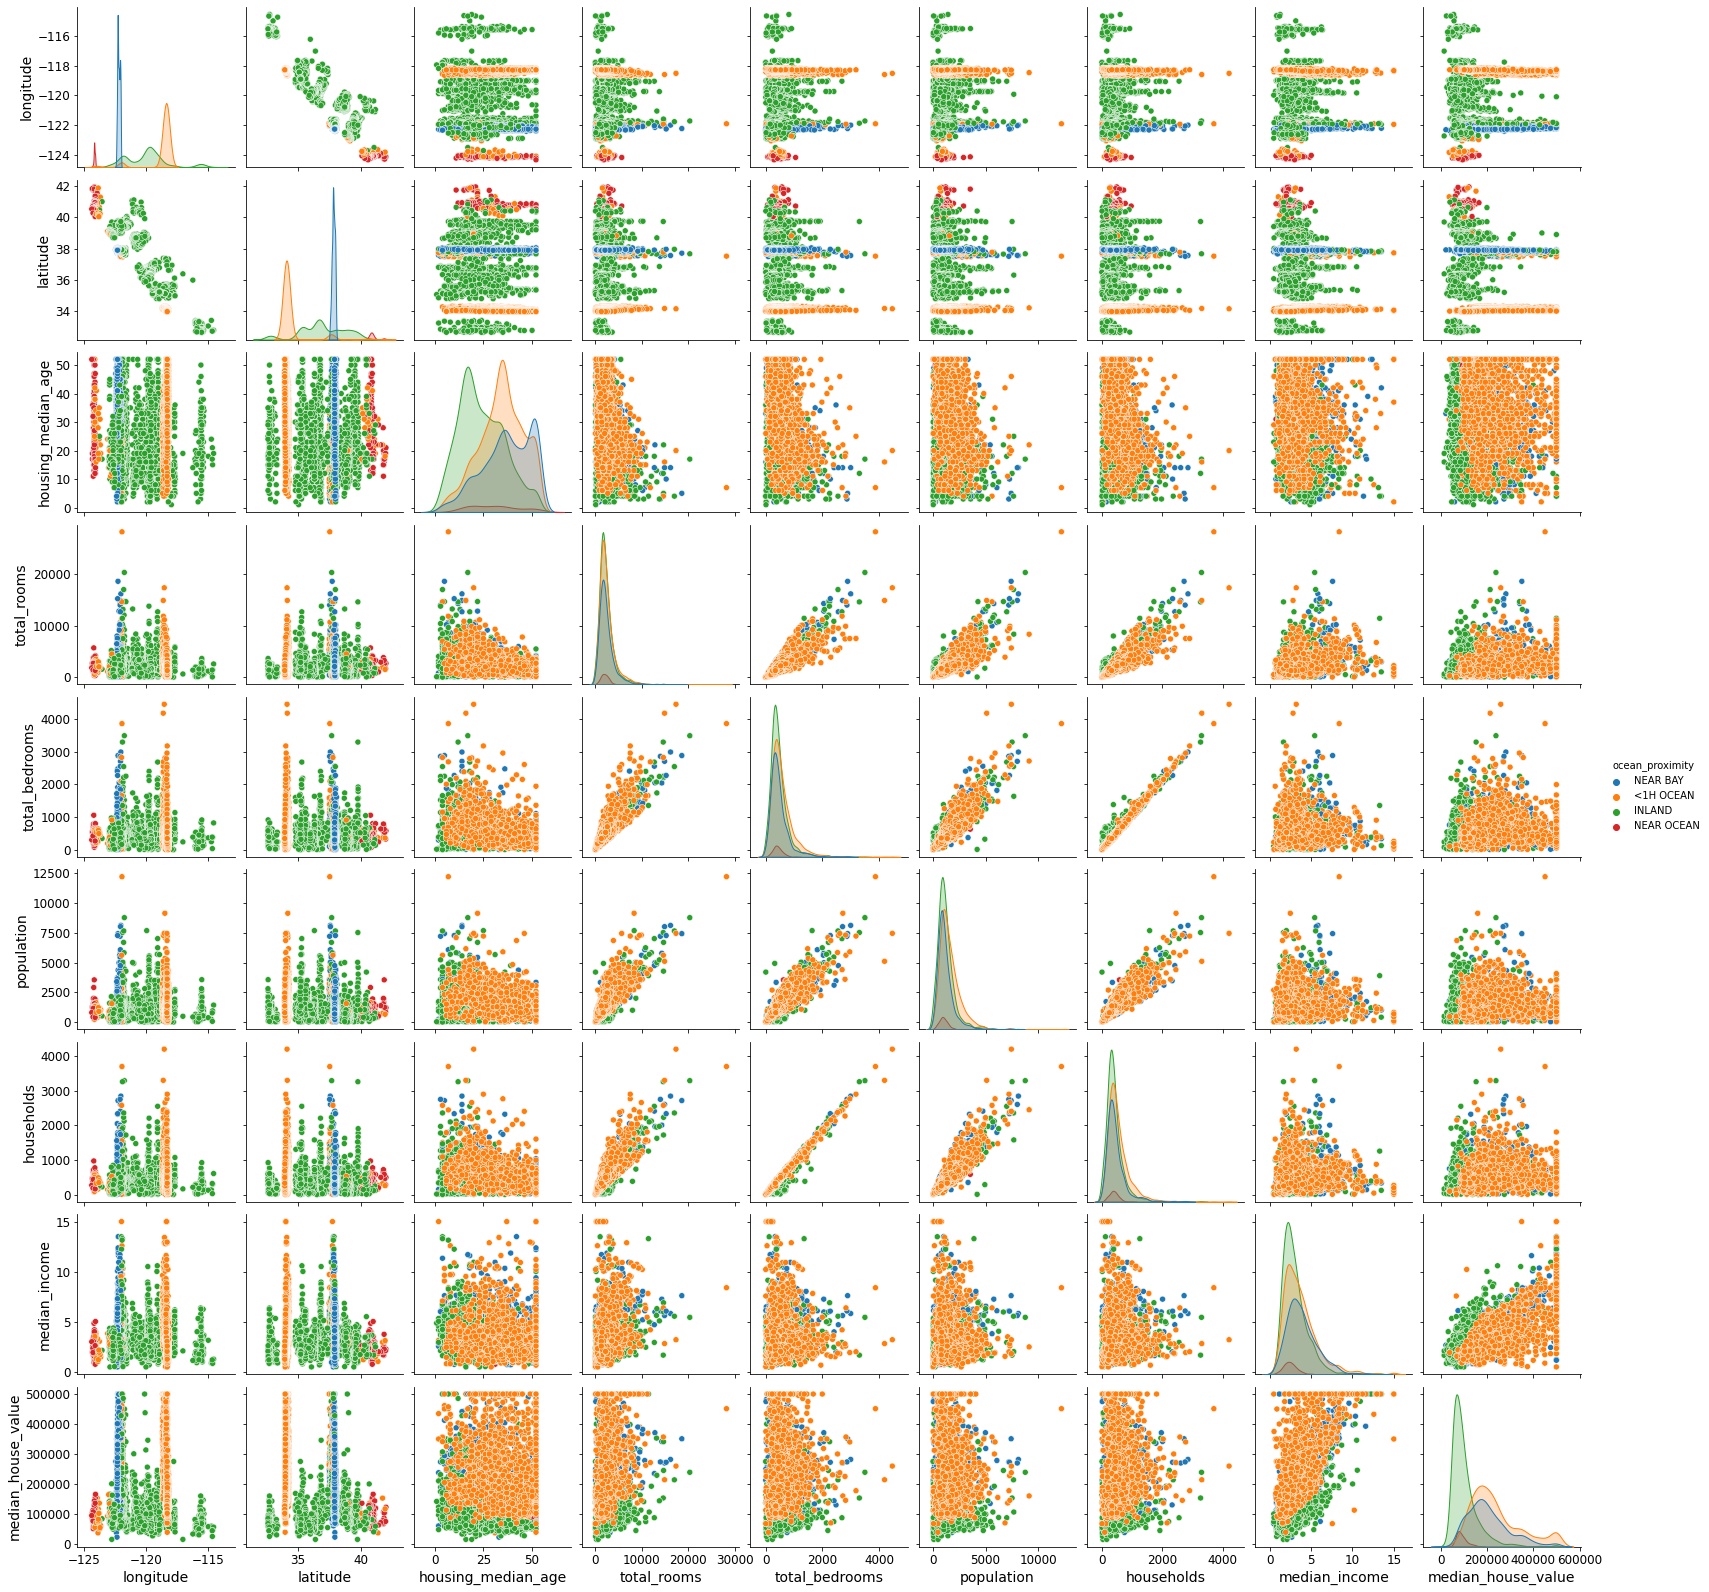

In [15]:
# tipically we group by the classes when we deal with a classification task
# In any case, we could see if there are any interesting pattern emerging, or differences in the distributions.

_ = sns.pairplot(housing[:5000],hue='ocean_proximity') 


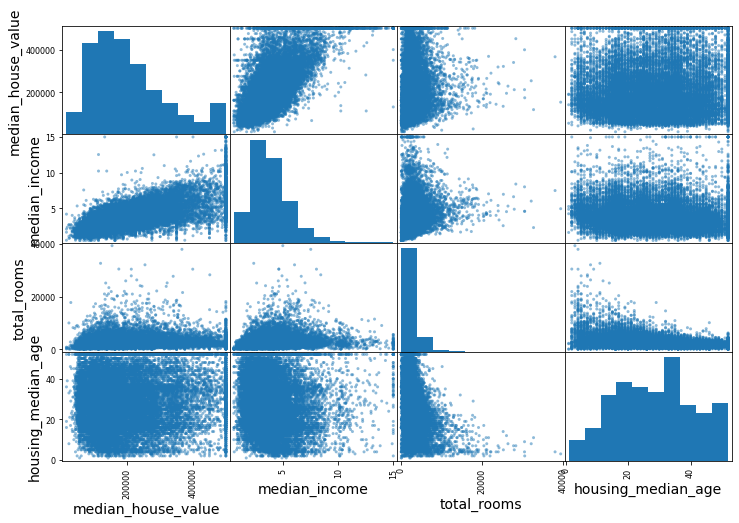

In [22]:

from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
_ = scatter_matrix(housing[attributes], figsize=(12, 8))
# save_fig("scatter_matrix_plot")

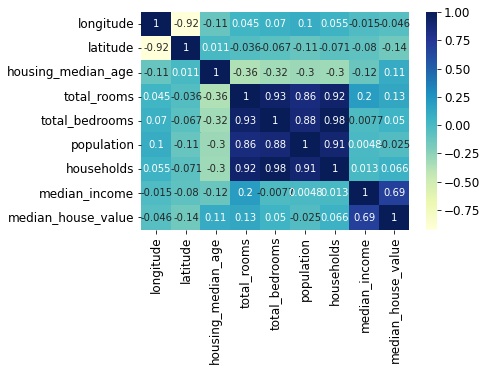

In [18]:
'''
Another check that we could do is to verify if features have strong correlation among them or with the target variable
'''

corr = housing.corr()
_ = sns.heatmap(corr, annot=True,cmap="YlGnBu")

In [19]:
'''
We can check which features have a greater correlation with the target variable 
'''
corr["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

Saving figure scatter_matrix_plot


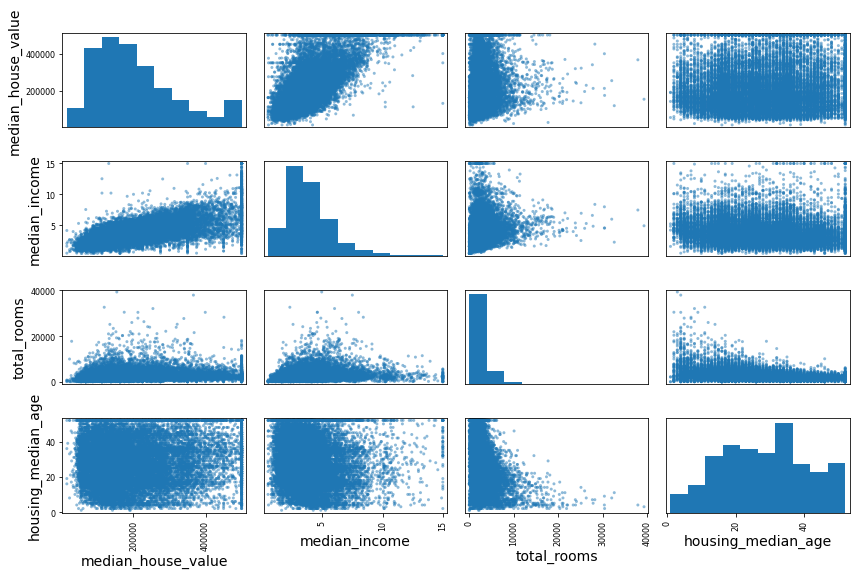

## Data preparation 

### Split in training and test. 

Scikit-learn provides to the developers a series of function that can be used to split the original dataset in training and test. 

- ***__Training__*** is the set used to train our model together with the relative pipeline
- ***__Test__*** is the dataset that shouldn't be touched until the very end of the ML process. Everything needs to be "learned" from the training set (e.g. imputing value for an inputer)

In [ ]:
from sklearn.model_selection import train_test_split

'''
1. random_state to get the same dataset split in different runs.
2. test_size the proportion of the dataset that we want to preserve for test, the rest is for training.
'''

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)